<a href="https://colab.research.google.com/github/DrSubbiah/1.Bayesian-Inference/blob/master/5_Random_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns

# <font color="darkblue"> "Reality exists in the human mind, and nowhere else"

Any five numbers randomly between 1 and 100

Find Average

Interpret

8,6,7,1,2

4.8



# <font color="darkblue"> Opportunities

<font color="green"> Pseudo Random Number Generators

- Machines are provided with some algorithm to **generate** random numbers

- One such method is <font color="maroon"> Linear Congruential Generator

$$x_{i+1} = (ax_i + c) ~\mathrm{mod}~ m ~~i=0,1,\cdots k$$ where  $a:$ Multiplier, $c:$ Increment$, m:$ modulus , and $x_0:$ Seed is a starting value. $k$ is the **size**, the number of random numbers to be generated

- The random integers are being generated in the range [0,m-1], and
to convert the integers to random numbers, divide the number by m except $0$

- Resultant random number is $\frac{x_i}{m}$

- Choice of the constants (except the seed) have significant impact on the **quality** of the generator

  - Uniformity

  - Independence

  - Efficiency

  - Reproducibility

  - Long Cycle Length

- <font color="blue">Mersenne Twister (MT) is the most prominent state-of-the-art generator

- Python specific notes [MT](https://docs.python.org/3/library/random.html)

- Arguments are many, context specific [Critic](http://www0.cs.ucl.ac.uk/staff/d.jones/GoodPracticeRNG.pdf)

<font color="red">**This is not the only method**

# <font color="darkblue"> Discrete Uniform in Python

- Usage of **stats** in **scipy** library

- <font color="blue">*randint.rvs(low, high, size)* </font>; arguments are number of random numbers (*size*) to be generated from the interval (*low,high*)   

In [ ]:
st.randint.rvs(low=30,high=100,size=100)

# <font color="darkblue"> Continous Uniform in Python

- Usage of **stats** in **scipy** library

- <font color="blue">*uniform.rvs(loc,scale,size)* </font>; arguments are number of random numbers (*size*) to be generated from the interval (*low,high*)  where *low = loc and high=loc + scale*

  - PDF is $f(x|\theta)=\frac{1}{\mathrm{high}-\mathrm{low}}$ for all $x \in (\mathrm{low},\mathrm{high})$

In [ ]:
st.uniform.rvs(loc=1,scale=4,size=10)
l=1
h=5
(l+h)/2

3.0

In [ ]:
R1=st.uniform.rvs(loc=1,scale=4,size=1000)
np.mean(R1)

2.993463079015578

# <font color="darkblue"> One Application

<font color="green"> Monte-Carlo Integration

Let us consider a continuous uniform random variable in $(5, 15)$. It's mean as per the formula is $$E[X]=\int_5^{15}x f(x) dx$$  $$=\int_5^{15}x \frac{1}{10} dx$$ $$=\big[\frac{x^2}{10*2}\big]_5^{15}$$ =$$=\frac{15^2-5^2}{10*2}$$

$$=\frac{225-25}{20} = 10$$

Alternatively, we can obtain this using the **Closed form formula** for mean of a random variable $X \sim \mathrm {U(Low, High)}$

$$E[X]=\frac{\mathrm {Low+High}}{2}$$

$$=\frac{15+5}{2}=10$$

## <font color="darkred"> Working Rule of Monte-Carlo Integration

1. Sample $k$ points from $\mathrm{U(L, H)}$

1. Evaluate the **integrand** $h(x)$ at these points

1. Compute $(\mathrm{H}-\mathrm{L})\frac{\sum h(x_i)}{k}$

Following code is <font color="green">**performing** </font> the above calculation using a Monte Carlo Integration.

In this example, $h(x)=\frac{x}{10}$ and L = 5 and H = 15

```
import numpy as np
from scipy import stats as st
L=5
s=10 #H = L + scale (s)
H=L+s
k=10
a=st.uniform.rvs(loc=5,scale=10,size=k)
b=a/10
(H-L)*np.sum(b)/k
```

The number (k) of samples can be chosen arbitrarily, and we are told that $k \rightarrow \infty$ meaning k is <font color="red">*sufficiently large*

In [ ]:
L=5
s=10 #H = L + scale (s)
H=L+s
k=100
a=st.uniform.rvs(loc=5,scale=10,size=k)
b=a/10
(H-L)*np.sum(b)/k

10.3620064611438

# <font color="darkblue"> Recap - More Summaries

[Need for Percentiles-Example](https://engineering.careers360.com/articles/jee-main-marks-vs-percentile)

## Major Limitations of Mean

- affected by extreme values

- may not be a right representative when the variability is high

## Measure of Location

- Median

- Quartiles

- Quintiles

- Deciles

- Percentiles (Percentage Point Function)

**Percentile** is a value $x_\alpha$ of the variable $X$ such that the  probability that $X$ will be less than or equal to $x_\alpha$ is $\alpha$. That is,$100\times\alpha^{th}$ percentile is

$$p[X \le x_{\alpha}]=\alpha$$ where $0 < \alpha<1$

- $\alpha$ is known (desired probability)

- $x_{\alpha}$ is to be determined by solving the integral equation

$$\int_{-\infty}^{x_\alpha} f(x|\theta)~ dx = \alpha$$

## <font color="darkred">Example

we assume income distribution (X) a Gamma distribution with shape 100 and scale = 0.1
$$X \sim Gamma(a = 100, b=0.1)$$ a: shape and b: scale

Want to know the high income group, say top 10%

Find the value x of **Income (X)** such that  $$p[X > x]=0.1$$

Equivalently, $$p[X \le x]=0.9$$

$$\int_0^{x} \frac{1}{\Gamma(a) b^a} x^{a-1}e^{-\frac{x}{b}}~ dx = 0.90$$

**<font color="red"> Computations involved**

In [ ]:
variable = st.gamma.rvs(a=100,loc=0,scale=0.10,size=100)
perc_90 = round(np.quantile(variable,0.9),2)
perc_90

11.33

In [ ]:
fig = plt.figure(figsize = (20, 10))
# # Create the plot
# sns.set_style('whitegrid')
ax=sns.kdeplot(np.array(variable))
plt.axvline(perc_90, 0,1,color='g')

percg = f"90th Percentile {perc_90}"
plt.title(percg,fontsize=35)

plt.text(perc_90-2, 0.11, "$Pr[X \leq x]=0.90$", horizontalalignment='left', fontsize=30, color='green', weight='bold')
plt.text(perc_90+0.1, 0.02, "$Pr[X > x]=0.10$", horizontalalignment='left', fontsize=20, color='red', weight='bold')
plt.show()

## <font color="Green"> Direct computation using PPF in stats

In [ ]:
st.gamma.ppf(0.90,a=100,loc=0,scale=0.10)

11.301052385984448

## <font color="Green"> Quartiles using PPF

In [ ]:
qrt=st.gamma.ppf([0.25,0.5,0.75],a=100,loc=0,scale=10)

qrt

array([ 930.85833837,  996.66864919, 1065.51092527])

# <font color="darkblue"> CDF as Inverse Function of PPF

**Recall**

Percentile is a value $x_\alpha$ of the variable $X$ such that the  probability that $X$ will be less than or equal to $x_\alpha$ is $\alpha$. That is,$100\times\alpha^{th}$ percentile is

$$p[X \le x_{\alpha}]=\alpha$$ where $0 < \alpha<1$


Now Cummulative Density Function CDF **computes the probabilty $\alpha$** for a chosen $x_\alpha$

- $x_{\alpha}$ is known (desired probability)

- $\alpha$ is to be determined by evaluating the integral

$$\int_{-\infty}^{x_\alpha} f(x|\theta)~ dx $$

## <font color="darkred">Example - Income Distribution

Now our interest may be to find the probability that Income is exceeding 12 units

$$\int_0^{12} \frac{1}{\Gamma(a) b^a} x^{a-1}e^{-\frac{x}{b}}~ dx$$

## <font color="Green"> Direct computation using CDF in stats

In [ ]:
st.gamma.cdf(x=[9,12,15],a=100,loc=0,scale=0.10)

# <font color="darkblue"> Inverse CDF - Application to Random Generation

- CDF of a random variable $X$ can be used to generate random numbers from $X$

- This is one of the methods for the process and simplest of all

- Yet, it has a limitation of the requirement - explicit knowledge of CDF

## <font color="green"> **Recipe**

Our intention is to generate a random number from a RV $X$ with PDF $f(x|\theta)$

- Let a number $u$ be generated from Uniform (0, 1)

- Equate this to the CDF $F(x)$ of $X$, the desired random variable

- This will give a randomly generated value from $X$

- **Algorithm**
--------
  1. $u \sim U(0, 1)$

  1. $u=F(x)$

  1. $x=F^{-1}(u)$
------

## <font color="green"> **Example**

### <font color="maroon"> **Exponential Distribution**

A widely applied distribution for modeling inter arrival time, time taken between two consecutive random occurences

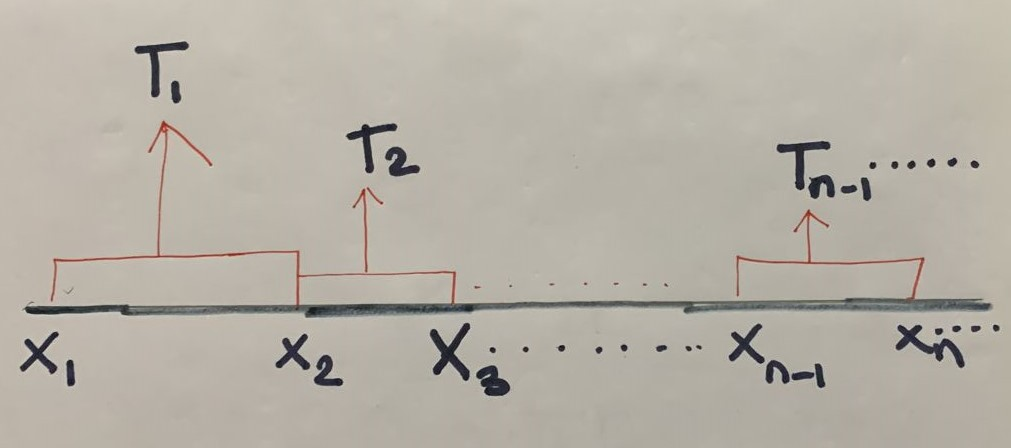

Recent Work on [IAT](https://www.stat.colostate.edu/~piotr/hieu.pdf)



$$X \sim \mathrm{Exponential} f(x|\theta)$$ with rate parameter $\theta$

Then CDF is $$F(x) = 1-e^{-\theta x}$$ for x > 0

Hence the second step of above algorithm becomes

$$u=1-e^{-\theta x}$$

Inverting

$$x=-\frac{1}{\theta}ln(1-u)$$

# <font color="darkblue"> Implemetation of the Algorithm - Inverse CDF Apprpoach to generate Random Numbers from Exponential Distribution

In [ ]:
u=st.uniform.rvs(0,1,10)
theta = 2
x=np.zeros_like(u)
for i in range(0,10):
    #print((-1/theta)* math.log(1-u[i]))
    x[i]=(-1/theta)* math.log(1-u[i])
u=pd.DataFrame(u)
x=pd.DataFrame(x)

a1=pd.concat([u,x],axis=1)
a1.columns=["u~Unif","x~Expo"]
print(a1.to_string(index=False))

   u~Unif    x~Expo
 0.114575  0.060844
 0.911518  1.212477
 0.980663  1.972859
 0.457556  0.305835
 0.163005  0.088969
 0.066528  0.034422
 0.092139  0.048332
 0.345534  0.211968
 0.725851  0.647042
 0.973333  1.812166


# <font color="darkblue"> Graphical Display - Undersand Shape and spread

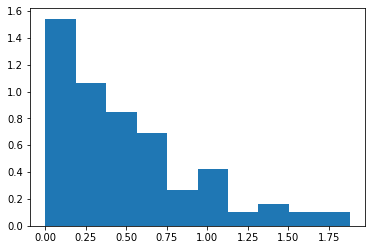

In [ ]:
k=100
u=st.uniform.rvs(0,1,k)
theta = 2
x=np.zeros_like(u)
for i in range(0,k):
    #print((-1/theta)* math.log(1-u[i]))
    x[i]=(-1/theta)* math.log(1-u[i])

x
plt.hist(np.array(x),density=True)
plt.show()

# <font color="darkblue"> Using in-built Exponential Distribution Generator

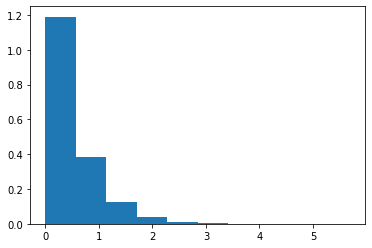

In [ ]:
k=100000
ex_r=st.expon.rvs(loc=0,scale=1/2,size=k)

plt.hist(np.array(ex_r),density=True)
plt.show()

# <font color="darkred"> Probability Computations

Probabilities using the PDF / PMF can be computed in a different notion

1. In the case of a DRV, PMF itself is the probability of the RV at a given value

2. If the RV is a CRV, then probability at an exact point is zero. It is calculated as **Area Under the Probability curve between two values of the RV**

- Assume X is a CRV in the range (L, H) with pdf $f(x|\theta)$; let a and be be two numbers in (L, H) then we can compute

  - $Pr[X>a]=\int_a^H f(x|\theta)dx$

  - $Pr[X<b]=\int_L^b f(x|\theta)dx$

  - $Pr[a<X<b]=\int_a^b f(x|\theta)dx$

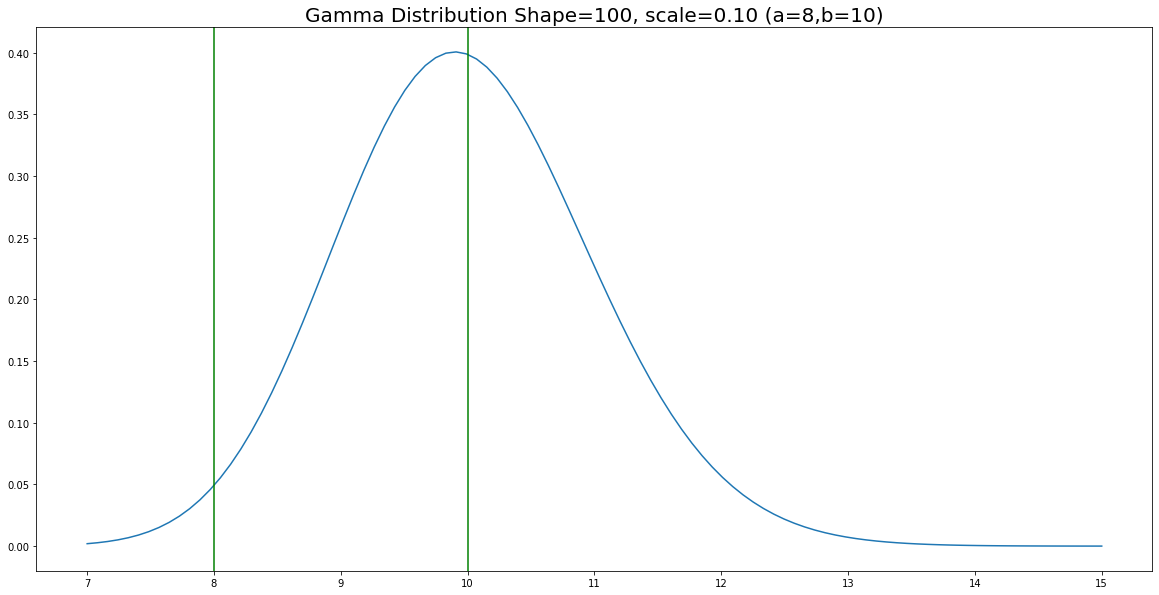

In [ ]:
x = np.linspace(7, 15, 100)

def f1(x):
    return st.gamma.pdf(x,a=100,loc=0,scale=0.10)
#f12 = np.vectorize(f1)
y=st.gamma.pdf(x,a=100,loc=0,scale=0.10)

fig = plt.figure(figsize = (20, 10))
# # Create the plot

plt.plot(x,y)
plt.axvline(8, 0,1,color='g')
plt.axvline(10, 0,1,color='g')


plt.title("Gamma Distribution Shape=100, scale=0.10 (a=8,b=10)",fontsize=20)
plt.show()

# <font color="darkblue"> About Scipy Distributions

**Conventions for these four basic functions**

1. pmf for DRV and pdf for CRV

1. cdf for both types

1. ppf for both types

1. rvs for both types

First three has similar input style (in most of the cases) with a note on three major parameters **location, scale and shape**

Fourth one (rvs) is to generate samples from the specified distribution has argument <font color="blue">*size*</font> after other inputs



# <font color="darkblue"> Discrete Uniform Distribution

In [ ]:
st.randint.pmf(k=6,low=5,high=10)

In [ ]:
st.randint.cdf(k=6,low=5,high=10)

In [ ]:
st.randint.ppf(q=0.6,low=5,high=10)

In [ ]:
st.randint.rvs(low=5,high=10,size=5)

# <font color="darkblue"> Continuous Uniform Distribution

In [ ]:
st.uniform.pdf(x=4,loc=5,scale=10)

In [ ]:
st.uniform.cdf(x=4,loc=5,scale=10)

In [ ]:
st.uniform.ppf(x=0.4,loc=5,scale=10)

In [ ]:
st.uniform.rvs(loc=5,scale=10,size=10)

# <font color="darkblue"> Binomial Distribution

In [ ]:
st.binom.pmf(5, 12,0.8)

0.0033218887679999924

In [ ]:
st.binom.cdf(5, 12,0.8)

0.0039031316479999968

In [ ]:
st.binom.ppf(0.5, 12,0.8)

10.0

In [ ]:
st.binom.rvs(12,0.8,size=50)

array([ 9, 10, 10, 10, 11,  9, 12,  9, 10, 10, 10,  8,  8, 10,  9, 11,  6,
       10,  9,  7,  7,  8,  9, 10, 11,  8, 10, 10, 11, 11,  7, 10, 10, 10,
       10,  7,  9,  9, 11,  9, 10, 12,  9, 10,  9, 10,  8,  8,  9,  9])

# # <font color="darkblue"> ECO System

- Elusive

- Compulsive

- Obsessive

1. Distributions are wealthier aspect in modelling science

1. Classification and Components of a distribution

1. How to read Distributions?

1. What to do with Dsitributions?

1. Computational ease with Monte-Carlo simulations

## <font color="red"> How these things help Bayesian Implementations?


# Two Classical Books

[Devroye Non-Uniform Random Variate Generation](http://www.eirene.de/Devroye.pdf)

[Robert Casella Monte Carlo Statistical Methods](https://link.springer.com/book/10.1007/978-1-4757-4145-2)